In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv ('1-FirstTenSignals.csv')
df1.head()

,I01,I02,I03,I04,I05,I06,I07,I08,I09,I10
0,3.970588,2.333333,3.966378,3.379443,-1.891451,1.758333,-0.195833,3.284109,3.925197,1.775591
1,3.954248,2.330065,3.978866,3.378482,-1.892411,1.770833,-0.187500,3.268058,3.937008,1.771654
2,3.934641,2.297386,3.970221,3.381364,-1.890490,1.775000,-0.204167,3.264848,3.956693,1.771654
3,3.950980,2.281046,3.961575,3.381364,-1.887608,1.766667,-0.200000,3.264848,3.984252,1.783465
4,4.013072,2.290850,3.932757,3.365034,-1.883766,1.787500,-0.191667,3.258427,4.000000,1.755906


# I01

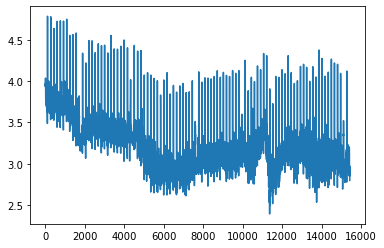

In [3]:
signal = df1['I01']
plt.plot(signal)

In [4]:
# estraggo i R peaks

freq = 257
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)

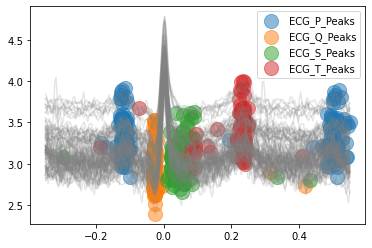

In [5]:
# estraggo tutti gli altri punti di interesse
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [6]:
waves_dwt

{'ECG_P_Peaks': [77,
  239,
  400,
  566,
  723,
  884,
  1045,
  1205,
  1368,
  1522,
  1857,
  2014,
  2169,
  2331,
  2491,
  2652,
  2809,
  2966,
  3128,
  3290,
  3452,
  3623,
  3787,
  3956,
  4122,
  4472,
  4642,
  4811,
  4976,
  5146,
  5312,
  5474,
  5644,
  5804,
  5966,
  6129,
  6291,
  6448,
  6612,
  6779,
  6937,
  7097,
  7251,
  7413,
  7502,
  7736,
  7894,
  8045,
  8210,
  8365,
  8518,
  8679,
  8831,
  8987,
  9140,
  9297,
  9450,
  9609,
  9768,
  10088,
  10247,
  10406,
  10482,
  10712,
  10870,
  11025,
  11178,
  11339,
  11488,
  11642,
  11800,
  11954,
  12116,
  12270,
  12422,
  12577,
  12739,
  12893,
  13050,
  13203,
  13357,
  13516,
  13830,
  13986,
  14140,
  14305,
  14457,
  14599,
  14770,
  14926,
  15245],
 'ECG_P_Onsets': [74,
  232,
  397,
  558,
  718,
  880,
  1039,
  1200,
  1365,
  1518,
  1856,
  2007,
  2166,
  2328,
  2474,
  2650,
  2803,
  2962,
  3122,
  3283,
  3448,
  3621,
  3783,
  3951,
  4120,
  4464,
  4636,
  4808

### Calcolo la media della distanza tra gli R peaks

In [7]:
rpeaks

{'ECG_R_Peaks': array([  107,   271,   433,   595,   757,   917,  1078,  1237,  1396,
         1556,  1884,  2043,  2203,  2364,  2522,  2680,  2840,  2998,
         3158,  3321,  3485,  3651,  3820,  3988,  4157,  4502,  4672,
         4842,  5009,  5175,  5343,  5506,  5672,  5835,  5999,  6162,
         6322,  6485,  6646,  6807,  6967,  7127,  7283,  7442,  7550,
         7768,  7926,  8082,  8240,  8395,  8550,  8707,  8861,  9016,
         9173,  9328,  9483,  9641,  9797, 10119, 10275, 10433, 10515,
        10744, 10900, 11055, 11209, 11365, 11519, 11674, 11830, 11985,
        12142, 12299, 12453, 12610, 12766, 12922, 13078, 13233, 13390,
        13547, 13859, 14017, 14173, 14331, 14487, 14643, 14799, 14955,
        15271]),
 'sampling_rate': 257}

In [8]:
picchi = rpeaks['ECG_R_Peaks']
length = len(picchi)

sum = 0

for i in range(length - 1):
    sum += picchi[i + 1] - picchi[i]
    
sum/(length - 1)/2

84.24444444444444

In [9]:
print(length)
84*2+1

91


169

In [10]:
single_hb = np.zeros([169,length])

# ogni colonna è un battito
for i in range(length):
    single_hb[:,i] = signal[picchi[i]-84:picchi[i]+85]
    

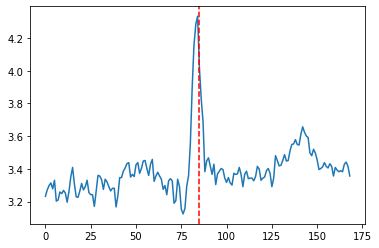

In [11]:
i = 65

plt.plot(single_hb[:,i])
plt.axvline(x = 85, color='r', linestyle='--')

In [14]:
for i in range(length):
    vertical_shift = (single_hb[0,i] + single_hb[-1,i])/2
    single_hb[:,i] -= vertical_shift


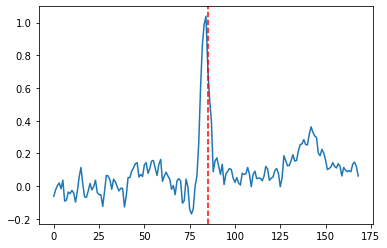

In [15]:
i = 65

plt.plot(single_hb[:,i])
plt.axvline(x = 85, color='r', linestyle='--')

In [16]:
hb_dic = {}

for i in range(length):
    hb_dic[i] = single_hb[:,i]

df = pd.DataFrame(hb_dic)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.016340,0.008170,-0.024510,0.009804,0.004902,-0.022876,0.089869,-0.001634,0.086601,0.009804,...,-0.078431,-0.060458,0.052288,-1.633987e-02,0.047386,-0.032680,0.006536,0.071895,-0.016340,0.022876
1,-0.003268,0.008170,0.004902,0.006536,0.063725,-0.052288,0.106209,-0.014706,0.063725,0.035948,...,-0.039216,-0.083333,-0.104575,-6.535948e-03,0.057190,-0.013072,0.003268,-0.039216,-0.101307,0.042484
2,0.039216,0.060458,0.044118,-0.039216,-0.008170,-0.098039,0.063725,-0.099673,-0.004902,-0.029412,...,-0.035948,-0.135621,-0.238562,6.535948e-03,0.066993,0.022876,0.003268,-0.081699,0.026144,-0.006536
3,0.026144,0.076797,0.021242,-0.009804,-0.047386,-0.120915,0.031046,-0.135621,0.050654,-0.013072,...,0.035948,-0.129085,-0.114379,4.440892e-16,-0.044118,0.003268,-0.016340,0.019608,0.120915,-0.081699
4,0.052288,0.063725,-0.017974,-0.039216,-0.004902,-0.084967,0.008170,-0.174837,0.060458,0.003268,...,0.088235,-0.070261,0.013072,2.941176e-02,-0.165033,0.026144,-0.016340,0.000000,0.114379,-0.022876


In [18]:
df.to_csv(r'HB_I01/Signals.csv', index = False)

Da questo shift devo determinare gli altri punti di interesse in relazione al picco

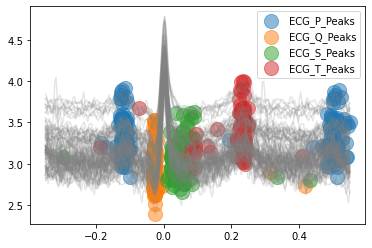

In [19]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [20]:
wave_peak_wrt_r = {}

chiavi = list(waves_peak.keys())

for i in range(10):
    wave_peak_wrt_r[chiavi[i]] = waves_peak[chiavi[i]] - picchi
    
wave_peak_wrt_r

{'ECG_P_Peaks': array([-30, -32, -33, -29, -34, -33, -33, -32, -28, -34, -27, -29, -34,
        -33, -31, -28, -31, -32, -30, -31, -33, -28, -33, -32, -35, -30,
        -30, -31, -33, -29, -31, -32, -28, -31, -33, -33, -31, -37, -34,
        -28, -30, -30, -32, -29, -48, -32, -32, -37, -30, -30, -32, -28,
        -30, -29, -33, -31, -33, -32, -29, -31, -28, -27, -33, -32, -30,
        -30, -31, -26, -31, -32, -30, -31, -26, -29, -31, -33, -27, -29,
        -28, -30, -33, -31, -29, -31, -33, -26, -30, -44, -29, -29, -26]),
 'ECG_P_Onsets': array([-33, -39, -36, -37, -39, -37, -39, -37, -31, -38, -28, -36, -37,
        -36, -48, -30, -37, -36, -36, -38, -37, -30, -37, -37, -37, -38,
        -36, -34, -37, -33, -33, -37, -32, -35, -37, -39, -33, -41, -39,
        -30, -31, -34, -36, -32, -51, -38, -39, -40, -39, -41, -37, -31,
        -38, -36, -37, -38, -36, -34, -35, -36, -35, -29, -35, -35, -34,
        -32, -35, -32, -34, -36, -34, -35, -28, -37, -34, -36, -30, -32,
        -30, -34, 

In [21]:
df_peaks = pd.DataFrame(wave_peak_wrt_r)

In [22]:
df_peaks.to_csv(r'HB_I01/Peaks.csv', index = False)

# each peak with respetc to the R peak for the 91 beats

# I02

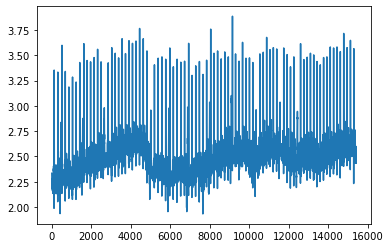

In [24]:
signal = df1['I02']
plt.plot(signal)

In [25]:
# estraggo i R peaks

freq = 257
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=freq)

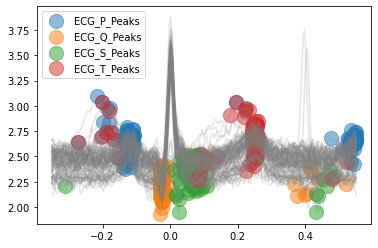

In [26]:
# estraggo tutti gli altri punti di interesse
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [27]:
waves_dwt

{'ECG_P_Peaks': [85,
  277,
  466,
  653,
  834,
  1015,
  1198,
  1383,
  1577,
  1753,
  1932,
  2109,
  2286,
  2462,
  2562,
  2827,
  3004,
  3179,
  3353,
  3532,
  3703,
  3882,
  4054,
  4233,
  4416,
  4602,
  4788,
  4886,
  5168,
  5354,
  5550,
  5741,
  5836,
  5933,
  6125,
  6314,
  6506,
  6694,
  6886,
  7072,
  7260,
  7448,
  7632,
  7811,
  7906,
  7999,
  8188,
  8367,
  8550,
  8731,
  8913,
  9097,
  9274,
  9453,
  9631,
  9804,
  9978,
  10154,
  10250,
  10513,
  10682,
  10852,
  11023,
  11189,
  11366,
  11456,
  11716,
  11889,
  12059,
  12229,
  12572,
  12741,
  12905,
  13071,
  13237,
  13403,
  13573,
  13742,
  13906,
  14076,
  14242,
  14415,
  14584,
  14756,
  14928,
  15101,
  15269],
 'ECG_P_Onsets': [81,
  270,
  456,
  649,
  830,
  1010,
  1195,
  1378,
  1573,
  1747,
  1926,
  2103,
  2282,
  2459,
  2558,
  2818,
  3001,
  3174,
  3347,
  3530,
  3695,
  3880,
  4050,
  4229,
  4412,
  4597,
  4785,
  4883,
  5164,
  5348,
  5545,
  5734

### Calcolo la media della distanza tra gli R peaks

In [28]:
rpeaks

{'ECG_R_Peaks': array([  120,   307,   517,   684,   867,  1051,  1232,  1416,  1624,
         1786,  1965,  2143,  2321,  2496,  2614,  2859,  3037,  3213,
         3385,  3561,  3734,  3911,  4088,  4266,  4449,  4635,  4821,
         4956,  5200,  5389,  5581,  5772,  5876,  5979,  6158,  6347,
         6536,  6727,  6934,  7106,  7292,  7478,  7662,  7844,  7950,
         8051,  8217,  8400,  8581,  8762,  8942,  9153,  9309,  9486,
         9664,  9838, 10014, 10187, 10294, 10542, 10713, 10885, 11054,
        11224, 11395, 11505, 11750, 11923, 12092, 12263, 12603, 12769,
        12937, 13103, 13269, 13435, 13602, 13770, 13937, 14108, 14277,
        14448, 14617, 14789, 14959, 15129, 15301]),
 'sampling_rate': 257}

In [29]:
picchi = rpeaks['ECG_R_Peaks']
length = len(picchi)

sum = 0

for i in range(length - 1):
    sum += picchi[i + 1] - picchi[i]
    
sum/(length - 1)/2

# io terrei comunuque 84

88.26162790697674

In [30]:
print(length)
84*2+1

87


169

In [31]:
single_hb = np.zeros([169,length])

# ogni colonna è un battito
for i in range(length):
    single_hb[:,i] = signal[picchi[i]-84:picchi[i]+85]
    

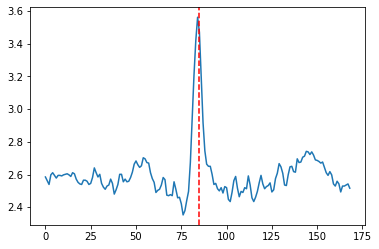

In [32]:
i = 64

plt.plot(single_hb[:,i])
plt.axvline(x = 85, color='r', linestyle='--')

In [33]:
for i in range(length):
    vertical_shift = (single_hb[0,i] + single_hb[-1,i])/2
    single_hb[:,i] -= vertical_shift


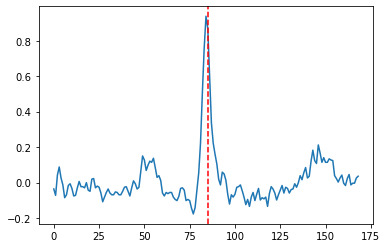

In [35]:
i = 55

plt.plot(single_hb[:,i])
plt.axvline(x = 85, color='r', linestyle='--')

In [36]:
hb_dic = {}

for i in range(length):
    hb_dic[i] = single_hb[:,i]

df = pd.DataFrame(hb_dic)

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.037582,0.000000,0.037582,-0.003268,0.037582,-0.032680,0.034314,-0.062092,0.000000,2.941176e-02,...,-0.001634,-0.031046,-0.027778,0.014706,-0.016340,-0.016340,-0.102941,-0.029412,-0.034314,0.000000
1,-0.060458,-0.006536,0.027778,-0.039216,0.053922,-0.019608,0.060458,-0.081699,-0.022876,9.803922e-03,...,0.031046,-0.057190,-0.027778,0.014706,-0.049020,-0.009804,-0.060458,-0.019608,-0.037582,0.052288
2,-0.076797,0.026144,0.047386,-0.042484,0.089869,-0.068627,0.031046,-0.078431,-0.006536,1.307190e-02,...,0.053922,-0.073529,0.017974,0.014706,-0.035948,0.019608,-0.021242,0.019608,-0.037582,0.013072
3,-0.073529,0.032680,0.073529,-0.019608,0.080065,-0.081699,0.008170,-0.045752,0.009804,-4.440892e-16,...,0.040850,-0.017974,0.004902,0.004902,-0.016340,-0.003268,0.004902,0.062092,-0.047386,0.026144
4,-0.086601,0.032680,0.037582,0.016340,0.044118,-0.039216,0.040850,-0.078431,0.022876,6.535948e-03,...,0.021242,0.050654,0.008170,-0.014706,0.013072,-0.029412,0.024510,0.078431,-0.083333,0.009804


In [38]:
df.to_csv(r'HB_I02/Signals.csv', index = False)

Da questo shift devo determinare gli altri punti di interesse in relazione al picco

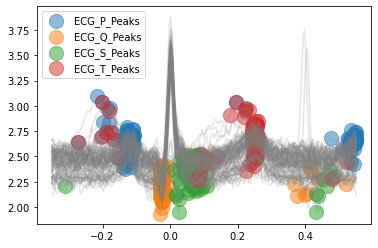

In [39]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=freq, method="dwt", show=True, show_type='peaks')

In [40]:
wave_peak_wrt_r = {}

chiavi = list(waves_peak.keys())

for i in range(10):
    wave_peak_wrt_r[chiavi[i]] = waves_peak[chiavi[i]] - picchi
    
wave_peak_wrt_r

{'ECG_P_Peaks': array([-35, -30, -51, -31, -33, -36, -34, -33, -47, -33, -33, -34, -35,
        -34, -52, -32, -33, -34, -32, -29, -31, -29, -34, -33, -33, -33,
        -33, -70, -32, -35, -31, -31, -40, -46, -33, -33, -30, -33, -48,
        -34, -32, -30, -30, -33, -44, -52, -29, -33, -31, -31, -29, -56,
        -35, -33, -33, -34, -36, -33, -44, -29, -31, -33, -31, -35, -29,
        -49, -34, -34, -33, -34, -31, -28, -32, -32, -32, -32, -29, -28,
        -31, -32, -35, -33, -33, -33, -31, -28, -32]),
 'ECG_P_Onsets': array([-39, -37, -61, -35, -37, -41, -37, -38, -51, -39, -39, -40, -39,
        -37, -56, -41, -36, -39, -38, -31, -39, -31, -38, -37, -37, -38,
        -36, -73, -36, -41, -36, -38, -44, -60, -38, -38, -32, -37, -55,
        -40, -38, -39, -35, -37, -54, -63, -31, -37, -37, -36, -32, -62,
        -40, -37, -37, -38, -38, -36, -47, -32, -36, -37, -39, -39, -32,
        -57, -38, -39, -38, -39, -36, -31, -35, -41, -37, -36, -35, -30,
        -38, -38, -38, -37, -37, -37, 

In [41]:
df_peaks = pd.DataFrame(wave_peak_wrt_r)

In [42]:
df_peaks.to_csv(r'HB_I02/Peaks.csv', index = False)

# each peak with respetc to the R peak for the 91 beats